In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv
/kaggle/input/digit-recognizer/sample_submission.csv


# Introduction

## Types of machine learning problems
- Supervised learning
    - Classification
    - Regression
    - ...
- Unsupervised learning
    - Clustering
    - ...
    
### Supervised learning
Supervised learning is a type of machine learning algorithms that is used when you have both the data and the target output and your goal is to learn the correlation between the data and the target output.  
One example is Classification which is going to be this notebook's example. You will be given 28 * 28 pixel data for a hand written digit from 0 to 9 and the goal is to know only from the pixel data what digit the data represents. So you should classify the data, hence the name.

### Unsupervised learning
Unsupervised learning algorithms are used when you don't have the target output for the training data. 
One example for clustering is when you have data of your ecommerce website users and you want to figure out how may sigments of users exists and what are there interests. In this case you're going to use the user features to cluster similar users together, however, notice that you don't know the number of clusters nor the names of the clusters.

## Classification
This problem is a classification problem which means we need to categorize our data to descrete known categories, in todays problem the data is pixel data of 28 x 28 images of hand written digits and we need to classify each entry to one of 10 categories (0, 1, 2, etc...). The data is flattened to 784 feature for simplicity

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC

train_df = pd.read_csv("/kaggle/input/digit-recognizer/train.csv")
test_df = pd.read_csv("/kaggle/input/digit-recognizer/test.csv")
submission = pd.read_csv("/kaggle/input/digit-recognizer/sample_submission.csv")

train_df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
train_df.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


As you can see, there is a label column in the training dataframe which is the target output and you have pixel values from pixel0 all the way to pixel783 which is basically a flattened 28 * 28 image. each pixel has a value between 0 and 255, 0 being black and 255 being white.  
Let's take a look at some of these images

In [4]:
def show_training_example(df, train=True):
    index = np.random.randint(len(df))
    example = df.iloc[index]
    if train:
        label = example[0]
        img = example[1:].values.reshape((28, 28))
    else:
        img = example.values.reshape((28, 28))
        label = "Unknown"
    plt.imshow(img, cmap="gray")
    plt.title(label)
    plt.show()

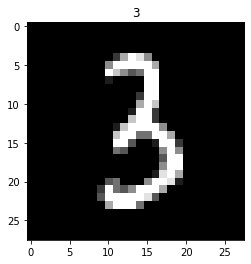

In [5]:
show_training_example(train_df)

The reason why the data is provided as a flattened array instead of an image is that almost all machine learning algorithms require a flat array (if we exclude deep learning).  

Now we are going to take only zeros and ones to do binary classification

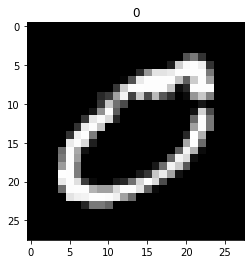

8816


In [6]:
# Now we are going to get images of only zeros and ones to do binar classification
binary_df = train_df.loc[train_df['label'] < 2]
show_training_example(binary_df)
print(len(binary_df))

## Logistic Regression for binary classification

> **Note** some basic linear algebra ahead

Let's assume the input features make a vector $X$ where the dimension of $X$ is $(n, 1)$ where $n$ is the number of features.  
Right now we have only one output which takes values 0 or 1 let's call it the hypothesis $h$ of shape $(c, 1)$ where $c$ the number of classes (one in this case). we need some tranformation matrix that takes us from $X$ to $O$, we will call this matrix the weights matrix $W$ where $W$ is of shape $(n, c)$.  
Our hypothesis $h = X \odot W$ however there are two problems with this hypothesis:
- The separating line between the two classes always (aka decision boundary) passes through the origin
- It outputs values from $-\infty$ to $\infty$ and we need numbers between 0 and 1

to solve the first problem we add the bias vector $b$ of shape $(1, 1)$ per example  
To solve the second we use the logistic sigmoid function which takes the real number line and squeezes it between 0 and 1.  
$$ h = \sigma(X \odot W + b) $$
Where
$$ \sigma(z) = \frac{1}{1+e^{-z}}$$


![With and without Bias term](https://www.jeremyjordan.me/content/images/2018/01/Screen-Shot-2017-06-29-at-5.34.44-PM.png)

In [7]:
def sigmoid(z):
    return 1. / (1. + np.exp(-z))

def hypothesis(X, W, b):
    return sigmoid(np.dot(X, W) + b)

What the hypothesis represents is the probability of the data example being of class 1, however, if we use it as is it will give random results simply because $W$ and $b$ are randomly initialized.  
We need a way to iteratively improve the values of $W$ and $b$ so that they would describe the data better.  
To do so we need to know how bad the current values are, and this is measured using the cost function.

We will write the loss function for one example and then we will write the general cost function and then explain both.
- Loss function
$$ l = - y\log(h(x)) - (1 - y)\log(1 - h(x)) $$
where $x$ is the feature vector for one example and $y$ is the target label.  

- Cost function over all examples
$$ L = \frac{1}{m}\sum_{i=1}^m - y_i\log(h(x_i)) - (1 - y_i)\log(1 - h(x_i)) $$
So the cost function is simply the mean of the loss over all training examples.  

Now let's see why this works.  
When $y_i == 1$ and $h(x_i) \simeq 0$ this means we got it wrong, this will cause the second term of the equation to equal 0 however the first term is goint to be $\log(~0)$ which is going to be a very big negative number.  
When $y_i == 1$ and $h(x_i) \simeq 1$ this means we got it right, this will cause the second term of the equation to equal 0 however the first term is goint to be $\log(~1)$ which is going to be a very small negative number.  

Now this proves that the Loss function we wrote earlier is a good indicator for how bad the model is which means we need to run some sort of optimization algorithm on this function to minimize it with respect to $W$ and $b$.

In [8]:
def cost(h, y):
    return (-y * np.log(h + 0.001) - (1 - y) * np.log(1 - h + 0.001)).mean()

## the small number in the log is to prevent log(0) which would overflow

### Gradient Descent
![Gradient Descent](https://cdn-images-1.medium.com/max/600/1*iNPHcCxIvcm7RwkRaMTx1g.jpeg)  

From vector analysis we know that the gradient of a function is the direction at which the function increases the most denoted by the symbol $\nabla$.  
If we can calculate the gradient of the cost function $\nabla L$ at any point and move in the opposite direction updating the weights and bias this is going to slowly decrease the loss until we reach a local minimum.  
Update equations
$$ W := W - \alpha * \nabla_{W} L $$
$$ b := b - \alpha * \nabla_{b} L $$
$ \nabla_{W} L = X^T \odot (h - y) $  
$ \nabla_{b} L = (h - y) $

In [9]:
# now let's start training
from sklearn.model_selection import train_test_split
X = binary_df.drop(columns=['label']).values / 255.
y = binary_df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(7052, 784)
(7052,)
(1764, 784)
(1764,)


In [10]:
W = np.random.rand(X_train.shape[1])
b = np.random.rand(1)
alpha = 0.1
epochs = 200
costs = []
for i in range(epochs):
    h = hypothesis(X_train, W, b)
    costs.append(cost(h, y_train))
    W -= alpha * np.dot(X_train.T, (h - y_train))
    b -= alpha * (h - y_train).mean()
    if i % 10 == 0:
        print(costs[-1])
    

3.265277967059318
0.03818799132497251
0.02839049782541736
0.024518823248439493


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


0.022512994661753008
0.02153661374661508
0.01957393278739879
0.01859333270284336
0.014741370953008362
0.012745087173516106
0.011736434487282163
0.011736434455981949
0.01173643445578874
0.011736434455787547
0.011736434455787542
0.010802148738443968
0.010799849797249683
0.009820780135980348
0.008922858165977016
0.008051786334940442


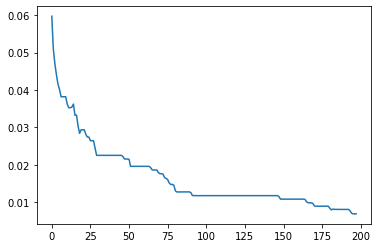

In [11]:
plt.plot(list(range(epochs-2)), costs[2:])
plt.show()

The loss is decreasing which is good!  
Now let's make predictions using our weight and bias

In [12]:
from sklearn.metrics import accuracy_score
h_test = hypothesis(X_test, W, b)
for i in range(h_test.size):
    h_test[i] = int(h_test[i] >= 0.5)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


In [13]:
accuracy_score(y_test, h_test)

0.9982993197278912

As you can see we can now get a model that can classify images of hand written zeros and ones with an accuracy of 99.7% which is not bad at all.  
Now we will use [sklearn.linear_model.LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) model

In [14]:
model = LogisticRegression(penalty="none")

model.fit(X_train, y_train)

accuracy_score(y_test, model.predict(X_test))

0.9994331065759637

Not too far

### Multi class classification
If you read the docs for the LogisticRegression classifier, it will tell you that for multiclass classification (which means you have more than two classes) it can use the one-vs-Rest method (OvR) if you set the `multi_class` parameter to 'ovr', however, by default it uses crossentropy loss for multiclass problems which is more complex than the simple log loss function.  
OvR means that for the mnist problem it would train one classifier that can say whether a digit is 0 or not, and another for ones and another for twos and so on, so it would train 10 models, one for each digit.

In [15]:
X = train_df.drop(columns=["label"]).values / 255.
y = train_df["label"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [16]:
# let's try crossentropy
model = LogisticRegression(penalty="none")
model.fit(X_train, y_train)

accuracy_score(y_test, model.predict(X_test))

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.9164285714285715

just out of curiousity, what is the accuracy score on the training data

In [17]:
accuracy_score(y_train, model.predict(X_train))

0.9417857142857143

It seems to be much higher, this happened because the mode memorized the training data and failed to generalize to new data, this phenominon is called overfitting and can be solved using regularization
### Regularization
regularization is so simple, all we need to do is add a term to the loss function that penalizes the model for having high weights.
$$ L = \frac{1}{m}\sum_{i=1}^m - y_i\log(h(x_i)) - (1 - y_i)\log(1 - h(x_i)) + \lambda \|{W}\|^2 $$  
In scikit learn you just need to set the `penalty` parameter to 'l2' which is the default value.  
Let's try it.

In [18]:
model = LogisticRegression(penalty='l2', C=0.01)
model.fit(X_train, y_train)

train_score = accuracy_score(y_train, model.predict(X_train))
test_score = accuracy_score(y_test, model.predict(X_test))

print("Training Accuracy: {}, Testing Accuracy: {}".format(train_score, test_score))

Training Accuracy: 0.9163690476190476, Testing Accuracy: 0.9117857142857143


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


If you look at the documentation you will see that the smaller the `C` parameter the stronger the regularization, which means it is the inverse of the $\lambda$ in the equation. try different values of `C` and see which results in the least overfitting

## Let's make a submission

In [19]:
X_train = train_df.drop(columns=["label"]).values / 255.
y_train = train_df["label"]
X_test = test_df.values / 255.

model = LogisticRegression()

model.fit(X_train, y_train)
y_test = model.predict(X_test)
submission["Label"] = y_test

submission.head()

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,7
4,5,3


In [20]:
submission.to_csv("result.csv", index=False)

### Let's try SVMs and see if we get better results
> **Note** SVMs are going to be explained in details in another notebook

In [21]:
X = train_df.drop(columns=["label"]).values / 255.
y = train_df["label"]
X_test = test_df.values / 255.

X_train, X_validate, y_train, y_validate = train_test_split(X, y, test_size=0.2)

model = LinearSVC()

model.fit(X_train, y_train)
preds_validate = model.predict(X_validate)

print(accuracy_score(preds_validate, y_validate))


0.9086904761904762


/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [22]:
X = train_df.drop(columns=["label"]).values / 255.
y = train_df["label"]
X_test = test_df.values / 255.

X_train, X_validate, y_train, y_validate = train_test_split(X, y, test_size=0.2)

model = SVC(kernel="rbf")

model.fit(X_train, y_train)
preds_validate = model.predict(X_validate)

print(accuracy_score(preds_validate, y_validate))


0.978452380952381


In [23]:
# later we will descuss the kernel trick
# now let's submit
preds_test = model.predict(X_test)
submission["Label"] = preds_test

submission.to_csv("results2.csv", index=False)